In [2]:
import torch 
import torch.utils.data as Data



ModuleNotFoundError: No module named 'torch'

In [36]:
BATCH_SIZE = 6

x=torch.linspace(1,10,10)
y=torch.linspace(10,1,10)
print(x, y)

dataset=Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
# , num_workers=2
print(dataset)
print(enumerate(loader))

for epoch in range(3):
    count=0
    for step, (batch_x, batch_y) in enumerate(loader):
        count+=1
        print(count)
        print("Epoch: ", epoch, "| Step: ", step, " | batch x: ", batch_x.numpy(), " | batch y:",batch_y.numpy())

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]) tensor([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])
1
Epoch:  0 | Step:  0  | batch x:  [6. 1. 4. 8. 7. 2.]  | batch y: [ 5. 10.  7.  3.  4.  9.]
2
Epoch:  0 | Step:  1  | batch x:  [ 9.  3. 10.  5.]  | batch y: [2. 8. 1. 6.]
1
Epoch:  1 | Step:  0  | batch x:  [ 9.  6. 10.  2.  4.  8.]  | batch y: [2. 5. 1. 9. 7. 3.]
2
Epoch:  1 | Step:  1  | batch x:  [5. 3. 1. 7.]  | batch y: [ 6.  8. 10.  4.]
1
Epoch:  2 | Step:  0  | batch x:  [7. 8. 2. 1. 4. 3.]  | batch y: [ 4.  3.  9. 10.  7.  8.]
2
Epoch:  2 | Step:  1  | batch x:  [ 5.  9.  6. 10.]  | batch y: [6. 2. 5. 1.]


In [53]:
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt 

x=torch.unsqueeze(torch.linspace(-1,1,1000), dim=1)
y=x.pow(2)+0.1*torch.normal(torch.zeros(*x.size()))

LR=0.01
BATCH_SIZE=32
EPOCH=12
# plt.scatter(x,y)
# plt.show()
# optimizer = torch.optim.SGD()
torch_dataset=Data.TensorDataset(x,y)
print(torch_dataset)
loader=Data.DataLoader(torch_dataset, batch_size=BATCH_SIZE, shuffle=True)

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1,20)
        self.predict = torch.nn.Linear(20,1)
    def forward(self, x):
        x=F.relu(self.hidden(x))   # input to the first hidden layer and bent the curve 
        x=self.predict(x)          # input the output from first layer to the second layer. 
        return x
# RMSprop, Momentum, Adam all better than SGD

In [1]:
net_SGD = Net()
net_Momentum = Net()
net_RMSprop = Net()
net_Adam = Net()
nets=[net_SGD ,net_Momentum , net_RMSprop, net_Adam]

opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers=[opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

loss_func=torch.nn.MSELoss()
Losses=[[],[],[],[]]

for epoch in range(EPOCH):
    print(epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        for net, opt, l_his in zip(nets, optimizers, Losses):
            output = net(batch_x)
            loss=loss_func(output, batch_y)
#             print(loss)
            opt.zero_grad(); # clear gradient
            loss.backward()
            opt.step()
            l_his.append(loss.item())
for i, l_his in enumerate(Losses):
    plt.plot(l_his)
plt.show()

NameError: name 'Net' is not defined

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter


input_data=torch.tensor([[1,2,0,3,1],
  [0,1,2,3,1],
  [1,2,1,0,0],
  [5,2,3,1,1],
  [2,1,0,1,1]], dtype=torch.float32)
input_data = torch.reshape(input_data, (-1,1,5,5))
print(input_data.shape)

dataset = torchvision.datasets.CIFAR10("./testdata", train=False, download=True, transform=torchvision.transforms.ToTensor())

dloader = DataLoader(dataset, batch_size=64)

writer = SummaryWriter("logs_max")

class testclass(nn.Module):
  def __init__(self):
    super(testclass, self).__init__();
    self.maxpool = nn.MaxPool2d(kernel_size=3,ceil_mode=True)
    
  def forward(self, x):
    return self.maxpool(x)
  
theclass = testclass()
theclass(input_data)

print(dir(dloader))
step = 0; 
for data in dloader: 
  imgs, targets = data; 
  writer.add_images("input", imgs, step)
  output = theclass(imgs); 
  writer.add_images("output", output, step)
  step+=1
  
writer.close()

torch.Size([1, 1, 5, 5])
Files already downloaded and verified
['_DataLoader__initialized', '_DataLoader__multiprocessing_context', '_IterableDataset_len_called', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_auto_collation', '_dataset_kind', '_get_iterator', '_get_shared_seed', '_index_sampler', '_is_protocol', '_iterator', 'batch_sampler', 'batch_size', 'check_worker_number_rationality', 'collate_fn', 'dataset', 'drop_last', 'generator', 'multiprocessing_context', 'num_workers', 'persistent_workers', 'pin_memory', 'pin_memory_device', 'prefetch_factor', 'sampler', 'timeout', 'wor

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

dataset = torchvision.datasets.CIFAR10("./testdata", train=False, download=True, transform=torchvision.transforms.ToTensor())
dloader = DataLoader(dataset, batch_size=64); 

writer = SummaryWriter("logs_linear")

class testlinear(nn.Module):
  def __init__(self):
    super(testlinear, self).__init__(); 
    self.l1 = nn.Linear(196608, 10)
#     self.l2 = nn.Linear(16*16, 10*10)
#     self.l3 = nn.Linear(10*10, 5*5)
#     self.l4 = nn.Linear(32, 10)
    
    
  def forward(self, x):
    x = self.l1(x)
#     x = self.l2(x)
#     x = self.l3(x)
#     output = self.l4(x)
    return x
    
themodel = testlinear()
for data in dloader:
  imgs, targets = data
#   imgs  = imgs.reshape(1,1,1,-1)
  imgs = torch.flatten(imgs)
  out = themodel(imgs)
  print(out.shape)
  print(imgs.shape)

Files already downloaded and verified
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([10])
torch.Size([196608])
torch.Size([

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x49152 and 196608x10)

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

import time

dataset = torchvision.datasets.CIFAR10("./testdata", train=False, download=True, transform=torchvision.transforms.ToTensor())
testset = torchvision.datasets.CIFAR10("./testdata", train=True, download=True, transform=torchvision.transforms.ToTensor())

# print(type(dataset))
# print(dir(dataset))


dloader = DataLoader(dataset, batch_size=64); 

tloader = DataLoader(testset, batch_size=64); 

class TestSeq(nn.Module):
  def __init__(self):
    super(TestSeq, self).__init__(); 
    
    self.seq1 = nn.Sequential(
      nn.Conv2d(3, 32, kernel_size=5, padding=2),      # (64, 32, 32, 32)
      nn.MaxPool2d(kernel_size=2),   # from 32 to 16   # (64, 32, 16, 16)
      nn.Conv2d(32, 32, kernel_size=5, padding=2),     # (64, 32, 16, 16)
      nn.MaxPool2d(kernel_size=2),   # from 16 to 8    # (64, 32, 8, 8)
      nn.Conv2d(32, 64, kernel_size=5, padding=2),     # (64, 64, 8, 8)
      nn.MaxPool2d(kernel_size=2),   # from 8 to 4     # (64, 64, 4, 4)
      nn.Flatten(),
      nn.Linear(1024, 64),
      nn.Linear(64, 10)
    )
    
  def forward(self, x): 
    output = self.seq1(x)
    return output 
  
  def save(self, fileout): 
    torch.save(self.state_dict, fileout)

  
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")

model = TestSeq(); 
model.to(device)

EPOCH = 10
# print(dir(model))
loss = nn.CrossEntropyLoss(); 
loss.to(device)

optim = torch.optim.SGD(model.parameters(), lr=0.01); 

for epoch in range(EPOCH):
  st = time.perf_counter()
  model.train()
  for data in dloader: 
    # Load the data and move to GPU 
    imgs, targets = data; 
    imgs = imgs.to(device)
    targets = targets.to(device)
    
    # Do the prediction and calculate the loss
    out = model(imgs)
    theloss = loss(out, targets)
    
    # optimize the model parameters
    optim.zero_grad();
    theloss.backward()
    optim.step()
    
  print(f"Time used for the Training of Epoch {epoch+1}: {time.perf_counter() - st}")
  model.save(f"/tmp/test{epoch}.pth")
  st_test = time.perf_counter()
  with torch.no_grad(): 
    model.eval()
    loss_total = 0 
    acc_total = 0 
    for tdata in tloader: 
      timgs, ttargets = tdata; 
      timgs = timgs.to(device)
      ttargets = ttargets.to(device)

      toutputs = model(timgs); 
      tloss = loss(toutputs, ttargets); 
      loss_total += tloss
      accuracy = (toutputs.argmax(1) == ttargets).sum()
      acc_total += accuracy
  print(f"Time used for testing {round(time.perf_counter() - st_test, 3)}; loss {round(tloss.item(), 3)}")
# writer = SummaryWriter("logs_max")
# writer.add_graph(model, theinp)



Files already downloaded and verified
Files already downloaded and verified
Time used for the Training of Epoch 1: 1.9944538730196655
Time used for testing 4.433; loss 2.297
Time used for the Training of Epoch 2: 1.0274411930004135
Time used for testing 4.328; loss 2.276
Time used for the Training of Epoch 3: 1.03229584696237
Time used for testing 4.433; loss 2.466
Time used for the Training of Epoch 4: 1.0617097339127213
Time used for testing 4.405; loss 2.526
Time used for the Training of Epoch 5: 1.0453310349257663
Time used for testing 4.482; loss 2.548
Time used for the Training of Epoch 6: 1.0830833320505917
Time used for testing 4.567; loss 2.559
Time used for the Training of Epoch 7: 1.0839977969881147
Time used for testing 4.461; loss 2.504
Time used for the Training of Epoch 8: 1.0894144400954247
Time used for testing 4.482; loss 2.46
Time used for the Training of Epoch 9: 1.045708658057265
Time used for testing 4.491; loss 2.446
Time used for the Training of Epoch 10: 1.0456

In [78]:
d_input = torch.tensor([1,2,3], dtype=torch.float32)
target = torch.tensor([1,2,5], dtype=torch.float32)
d_input = torch.reshape(d_input, (1,1,1,3))
target = torch.reshape(target, (1,1,1,3))
loss = nn.CrossEntropyLoss()
res = loss(d_input, target)
print(res)

tensor(-0.)


In [10]:
import torchvision
print(dir(torchvision.datasets))
model = torchvision.models.vgg16(pretrained=False)
model2 = torchvision.models.vgg16(pretrained=True)
print(model)
print(dir(model2))


['CIFAR10', 'CIFAR100', 'Cityscapes', 'CocoCaptions', 'CocoDetection', 'DatasetFolder', 'EMNIST', 'FakeData', 'FashionMNIST', 'Flickr30k', 'Flickr8k', 'ImageFolder', 'KMNIST', 'LSUN', 'LSUNClass', 'MNIST', 'Omniglot', 'PhotoTour', 'SBU', 'SEMEION', 'STL10', 'SVHN', 'VOCDetection', 'VOCSegmentation', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'cifar', 'cityscapes', 'coco', 'fakedata', 'flickr', 'folder', 'lsun', 'mnist', 'omniglot', 'phototour', 'sbu', 'semeion', 'stl10', 'svhn', 'utils', 'voc']
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inpl

# Model saving and loading 
<code>Recommended method:  
torch.save(model.state_dict(), "/tmp/vgg16_dic.pth")
model = torchvision.models.vgg16(pretrained=False)
model.load_state_dict(torch.load("/tmp/vgg16_dic.pth"))</code>

In [17]:
import torch 
import torchvision
model = torchvision.models.vgg16(pretrained=False)
torch.save(model, "/tmp/vgg16.pth")

# vgg_model = torch.load("/tmp/vgg16.pth")
# print(vgg_model)
# print(model.state_dict())


torch.save(model.state_dict(), "/tmp/vgg16_dic.pth")
model = torchvision.models.vgg16(pretrained=False)
model.load_state_dict(torch.load("/tmp/vgg16_dic.pth"))
print(model)
 



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [20]:
class tudui(nn.Module): 
  def __init__(self):
    super(tudui, self).__init__(); 
    self.conv1 = nn.Conv2d(3, 64, 3)
  def forward(self, x): 
    x = self.conv1(x)
    return x
  
model = tudui()
print(model)
torch.save(model, "/tmp/test_save_m1.pth")



tudui(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
)
tudui(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
)


In [4]:
import torch 
import torch.nn as nn
class tudui(nn.Module): 
  def __init__(self):
    super(tudui, self).__init__(); 
    self.conv1 = nn.Conv2d(3, 64, 3)
  def forward(self, x): 
    x = self.conv1(x)
    return x
  
model2= torch.load("/tmp/test_save_m1.pth")
print(model2)

tudui(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
)


In [2]:
import torch 
torch.cuda.is_available()

True

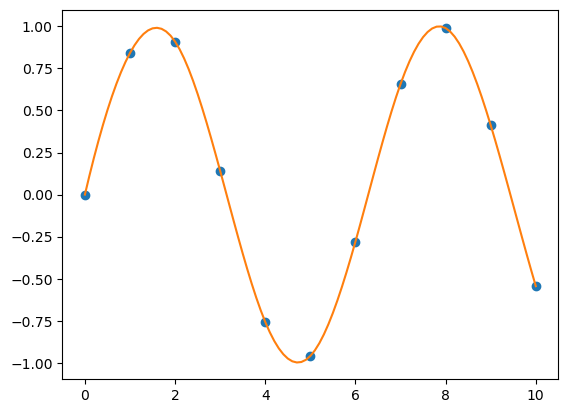

In [2]:
import numpy as np 

from scipy.interpolate import interp1d

import matplotlib.pyplot as plt

import numpy as np
x = np.arange(0, 11) # original sample points, [0, 1, 2, …, 9, 10]

y = np.sin(x)

f = interp1d(x, y, kind='cubic')  # Cubic means the cubic B-spline.

x_new = np.arange(0, 10.1, 0.1) # new sample points, [0, 0.1, 0.2, ….., 9.9, 10]

y_new = f(x_new)

plt.plot(x,y,'o',x_new, y_new)

plt.show()